<a href="https://colab.research.google.com/github/Monthe5/Portfolio-Projects/blob/main/Data_Pipeline_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#The API_KEY is the key obtained from the OpenWeather app

#This section of the code extracts data for Nairobi city


import requests
import pandas as pd

API_KEY = '721be2cd8e579315bf02e6e3bd19b69e'
City = 'Nairobi'

url = f"http://api.openweathermap.org/data/2.5/weather?q={City}&appid={API_KEY}&units=metric"

response = requests.get(url).json()
response


{'coord': {'lon': 36.8167, 'lat': -1.2833},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 24.93,
  'feels_like': 24.29,
  'temp_min': 24.93,
  'temp_max': 25.62,
  'pressure': 1010,
  'humidity': 31,
  'sea_level': 1010,
  'grnd_level': 837},
 'visibility': 10000,
 'wind': {'speed': 5.14, 'deg': 120},
 'clouds': {'all': 40},
 'dt': 1767614614,
 'sys': {'type': 1,
  'id': 2558,
  'country': 'KE',
  'sunrise': 1767583924,
  'sunset': 1767627813},
 'timezone': 10800,
 'id': 184745,
 'name': 'Nairobi',
 'cod': 200}

In [2]:
# To extract data for other cities

cities =["Nairobi", "Cape Town", "Lagos", "Cairo", "Johannesburg",
    "London", "Paris", "Berlin", "Madrid", "Rome",
    "New York", "Los Angeles", "Chicago", "Toronto", "Mexico City",
    "Tokyo", "Beijing", "Mumbai", "Seoul", "Bangkok",
    "Sydney", "Melbourne", "Auckland", "Jakarta", "Manila",
    "São Paulo", "Buenos Aires", "Santiago", "Lima", "Bogotá"]
data_list = []
for city in cities:
  url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
  r = requests.get(url).json()
  data_list.append({
      'city': city,
      'temp': r['main']['temp'],
      'humidity': r['main']['humidity'],
      'weather': r['weather'][0]['description']
  })
df = pd.DataFrame(data_list)
df


,city,temp,humidity,weather
0,Nairobi,24.93,31,scattered clouds
1,Cape Town,27.46,54,clear sky
2,Lagos,35.89,41,scattered clouds
3,Cairo,19.42,39,haze
4,Johannesburg,20.94,56,moderate rain
5,London,1.52,67,scattered clouds
6,Paris,-1.60,95,mist
7,Berlin,0.31,71,clear sky
8,Madrid,2.77,74,clear sky
9,Rome,6.81,81,clear sky


In [7]:
#Now with the data its possible to do further analysis and present the data in other forms
#This section be used to add new variables pertaining to the information extracted

#this will add a categorical variable for the temperature
def temp_category(temp):
    if temp < 10: return "Cold"
    elif temp < 25: return "Mild"
    else: return "Hot"

df["temp_category"] = df["temp"].apply(temp_category)


#this will compare a city's temperature to the global mean temperature
global_avg = df["temp"].mean()
df["above_global_avg"] = df["temp"] > global_avg
df

,city,temp,humidity,weather,temp_category,above_global_avg
0,Nairobi,24.93,31,scattered clouds,Mild,True
1,Cape Town,27.46,54,clear sky,Hot,True
2,Lagos,35.89,41,scattered clouds,Hot,True
3,Cairo,19.42,39,haze,Mild,True
4,Johannesburg,20.94,56,moderate rain,Mild,True
5,London,1.52,67,scattered clouds,Cold,False
6,Paris,-1.60,95,mist,Cold,False
7,Berlin,0.31,71,clear sky,Cold,False
8,Madrid,2.77,74,clear sky,Cold,False
9,Rome,6.81,81,clear sky,Cold,False


<Axes: title={'center': 'Temperatures by City'}, xlabel='city'>

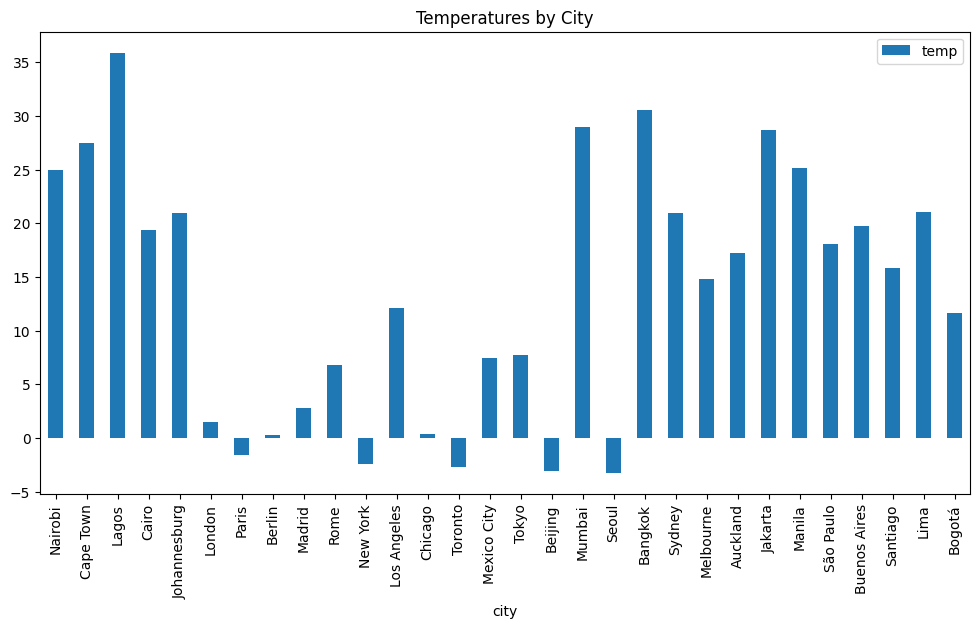

In [8]:
#To present the data in a visual, bar chart can be used to show the temperature in all cities

df.plot(x="city", y="temp", kind="bar", figsize=(12,6), title="Temperatures by City")


<Axes: title={'center': 'Temperature Categories'}, ylabel='count'>

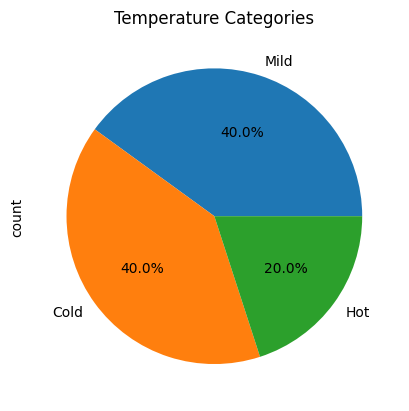

In [9]:
#since we have the temperature category as well, a pie chart can be used to visualize the data
df["temp_category"].value_counts().plot.pie(autopct="%1.1f%%", title="Temperature Categories")


<Axes: title={'center': 'Temperature vs Humidity'}, xlabel='temp', ylabel='humidity'>

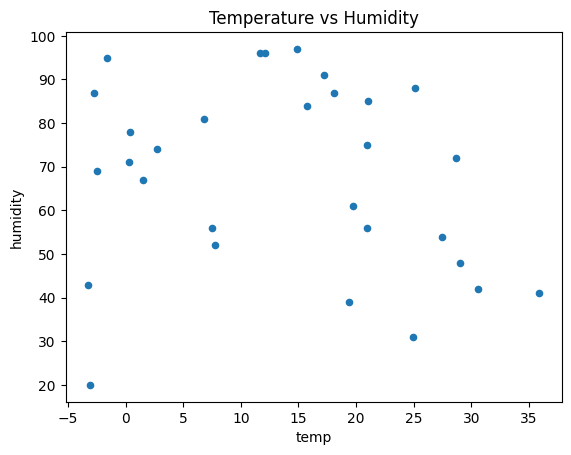

In [10]:
#Moreover, a scatter plot of humidity vs temperature can be useful
df.plot.scatter(x="temp", y="humidity", title="Temperature vs Humidity")


**Interpretation: Temperature vs Humidity**

This scatter plot shows the relationship between temperature (°C) on the x-axis and humidity (%) on the y-axis across the sampled cities.

1. Overall Relationship

There is a **weak negative relationship** between temperature and humidity.

Both high and low humidity values appear across a wide range of temperatures.

This indicates that temperature alone is not a strong predictor of humidity in this dataset.

2. High Humidity Across Moderate Temperatures

Many points with very high humidity (80–95%) cluster around moderate temperatures (10–20°C).

This is typical of coastal or temperate regions, where moisture levels remain high even when temperatures are not extreme.

3. Hotter Temperatures Tend Toward Lower Humidity

At higher temperatures (25–35°C), humidity values are more spread out but tend to be moderate to low (30–60%).

This pattern is consistent with hotter, drier climates, such as inland or semi-arid regions.

4. Cooler Temperatures Show Variability

At lower temperatures (below 5°C), humidity ranges from very low ( approximately 20%) to very high (approximately 95%).

This suggests differing climatic conditions (e.g., cold-dry vs cold-humid environments).

Key Takeaway

The plot suggests that while extreme heat often coincides with lower humidity, overall humidity varies widely across temperatures, indicating that regional and climatic factors play a significant role beyond temperature alone.


The scatter plot demonstrates that temperature and humidity do not exhibit a strong linear relationship across global cities. High humidity is frequently observed at moderate temperatures, while higher temperatures tend to show lower and more dispersed humidity levels, reflecting the influence of regional climate patterns.

<Axes: title={'center': 'Average Temperature Over Time'}, xlabel='timestamp'>

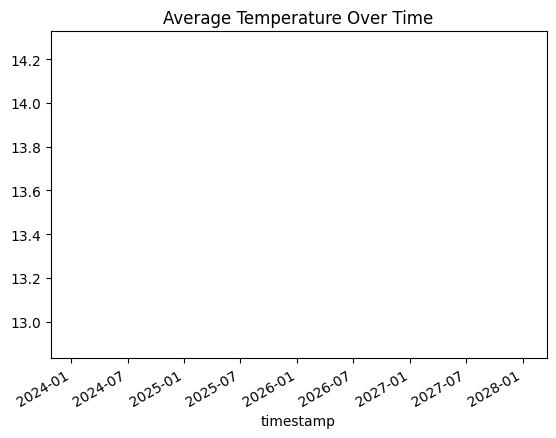

In [13]:
#A time series analysis can also be done if the data for several days is collected
#It is possible to add a append on every run which saves the daily data into a csv file for the time series analysis

import datetime

df["timestamp"] = datetime.datetime.now()

df.to_csv("weather_data.csv", mode="a", header=not pd.io.common.file_exists("weather_data.csv"), index=False)

#The code for the times series
df.groupby("timestamp")["temp"].mean().plot(kind="line", title="Average Temperature Over Time")



**Conclusion**

This project demonstrates the design and implementation of an end-to-end data pipeline using real-world weather data. By ingesting live data from the OpenWeatherMap API, transforming and enriching it through cleaning, categorization, and feature engineering, and storing the results for analysis, the pipeline illustrates a complete Extract–Transform–Load (ETL) workflow.

The analysis revealed meaningful patterns, including a weak inverse relationship between temperature and humidity and significant variability across cities and climate regions. These findings highlight the importance of contextual and geographic factors in weather data and reinforce the value of structured data processing before analysis.

From a technical perspective, the project showcases practical skills in API integration, data transformation with Python and Pandas, incremental data loading, and exploratory data analysis through visualization. The pipeline is reproducible, extensible, and suitable for automation, making it representative of real-world data engineering and analytics use cases.

Overall, this project serves as a strong portfolio example of building scalable, insight-driven data pipelines and translating raw data into actionable insights.